In [70]:
dut.disconnect()

Serial port disconnected.


In [ ]:
dut.ground_PIC()

In [634]:
dut.reset_chip()
dut.reset_dpe()

In [67]:
dut.power_off()

In [1]:
%reload_ext autoreload
%autoreload 2

import dut_func as dut
import serial
import time
import struct
import numpy as np
# from bitarray import bitarray
from bitstring import BitArray
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
import dut_a0 as a0

from misc import *

# dut.drv.serUSB = 'COM19'
drv = dut.drv

ser = serial.Serial('COM6', 9600, timeout=1)
dut.connect(ser)


In [2]:
dut.power_on()

DAC initialized to a span from -5 V to 5 V


In [3]:
drv.gpio_pin_set('H', 1)

Calibrate all 12 ADCs on A0

In [129]:
ar=2
r=31
c=0

Vreads = np.arange(0, 0.5, 0.01)
# Vgates = np.arange(0,5,0.5)
# Vgates = [1, 1.1, 1.2, 1.3, 1.4, 1.5, 5]
Vgates = [5]

volts_set = []

for Vgate in Vgates:
    print(f'{Vgate:.2f}', end='-')
    volts = []
    for vread in Vreads:
        volts.append( a0.read_single(vread, Vgate, array=ar, row=r, col=c, gain=4) )
    volts_set.append(volts)

5.00-

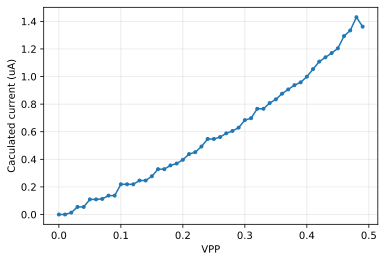

In [130]:
for volts in volts_set:
    plt.plot(Vreads, [i* 1e6 for i in volts], '.-')
    
plt.xlabel('VPP')
plt.ylabel('Caculated current (uA)')
plt.grid(True, alpha=0.3)
# plt.ylim(-0.1, 6)

3.00-

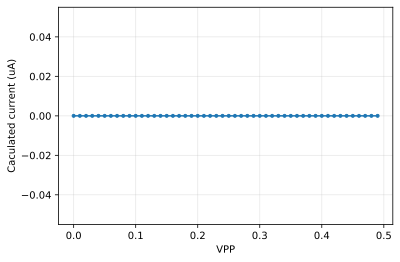

In [146]:
ar=2
r=6
c=25

Vreads = np.arange(0, 0.5, 0.01)
# Vgates = np.arange(0,5,0.5)
# Vgates = [1, 1.1, 1.2, 1.3, 1.4, 1.5, 5]
# Vgates = [4, 3, 2, 1.5]
Vgates = [3]
Vref = 0.5

volts_set = []

for Vgate in Vgates:
    print(f'{Vgate:.2f}', end='-')
    volts = []
    for vread in Vreads:
        volts.append( a0.read_single_int(vread, Vgate, array=ar, row=r, col=c, gain=4, Vref = Vref) )
    volts_set.append(volts)
    
for volts in volts_set:
    plt.plot(Vreads, [i* 1e6 for i in volts], '.-')
    
plt.xlabel('VPP')
plt.ylabel('Caculated current (uA)')
plt.grid(True, alpha=0.3)
# plt.ylim(-0.1, 6)

In [135]:
ar=2
r=31
c=0


Vread=0.1
Vgate=5

curr_list = []
# a0.read_single_int(Vread, Vgate, array=ar, row=r, col=c, gain=2) * 1e6
for Tsh in range(100):
    curr_list.append( a0.read_single_int(Vread, Vgate, array=ar, row=r, col=c, gain=4, Tsh=Tsh) )

Text(0, 0.5, 'Current @ 0.2 V')

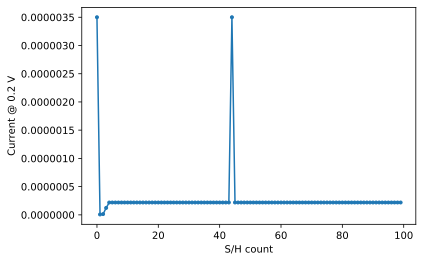

In [137]:
plt.plot(range(100), curr_list, '.-')
# plt.ylim(0,7e-5)
plt.xlabel('S/H count')
plt.ylabel('Current @ 0.2 V')
# for i in range(256):
#     print(f'{i} - {curr_list[i]}')

In [36]:
Vread=0.1
Vgate=5

curr_list = []
for Tsh in range(256):
    curr_list.append( a0.read_single(vread, Vgate, array=ar, row=r, col=c, gain=2) )

(0, 7e-05)

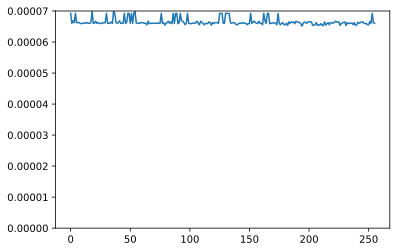

In [37]:
plt.plot(range(256), curr_list)
plt.ylim(0,7e-5)

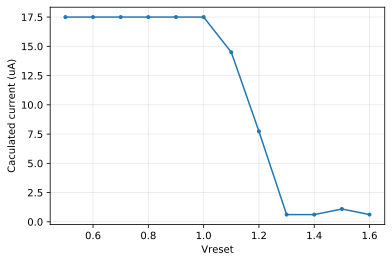

In [126]:
ar=2
r=8
c=4

Vreset = np.arange(0.5, 1.7, 0.1)
Vgate = 5
Vread = 0.2
volts = []
for Vr in Vreset:
    a0.reset_single_int(Vr, Vgate, array=ar, row=r, col=c)
    volts.append( a0.read_single_int(Vread, Vgate, array=ar, row=r, col=c, gain=3) )
    

plt.plot(Vreset, [i* 1e6 for i in volts], '.-')
    
plt.xlabel('Vreset')
plt.ylabel('Caculated current (uA)')
plt.grid(True, alpha=0.3)
# plt.ylim(-0.1, 6)
    

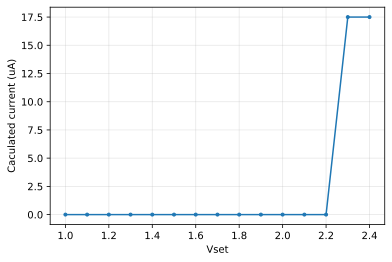

In [154]:
ar=2
r=46
c=25

Vset = np.arange(1, 2.5, 0.1)
Vgate = 1.5
Vread = 0.2
volts = []

for Vs in Vset:
    a0.set_single_int(Vs, Vgate, array=ar, row=r, col=c)
    volts.append( a0.read_single_int(Vread, Vgate, array=ar, row=r, col=c, gain=3) )
    

plt.plot(Vset, [i* 1e6 for i in volts], '.-')
    
plt.xlabel('Vset')
plt.ylabel('Caculated current (uA)')
plt.grid(True, alpha=0.3)
# plt.ylim(-0.1, 6)
    

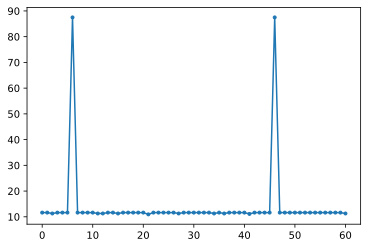

In [156]:
ar = 2
c = 25

Vread = 0.2
row = np.arange(0, 61, 1)
Vgate = 3
volts =[]

for r in row:
    volts.append( a0.read_dpe_single_int(Vread, Vgate, array=ar, row=r, col=c, gain=3) )

plt.plot(row, [a/0.2*1e6 for a in volts], '.-')


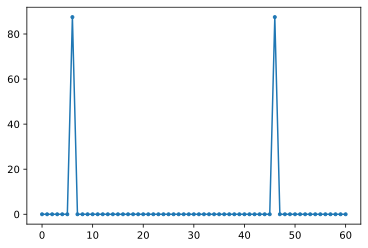

In [157]:
ar = 2
c = 25

Vread = 0.2
row = np.arange(0, 61, 1)
Vgate = 3
volts =[]

for r in row:
    volts.append( a0.read_single_int(Vread, Vgate, array=ar, row=r, col=c, gain=3) )

plt.plot(row, [a/0.2*1e6 for a in volts], '.-')